In [1]:
!pip install sentence-transformers nltk python-docx PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [26]:
from sentence_transformers import SentenceTransformer, util
import re

# Load the Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


In [35]:
def get_sentences(text):
    # Split text into sentences using punctuation
    sentences = re.split(r'(?<=[.!?]) +', text.strip())
    return [s.strip() for s in sentences if s.strip()]

def compute_similarity(text1, text2, threshold=0.75):
    sent1 = get_sentences(text1)
    sent2 = get_sentences(text2)

    emb1 = model.encode(sent1, convert_to_tensor=True)
    emb2 = model.encode(sent2, convert_to_tensor=True)

    cosine_scores = util.pytorch_cos_sim(emb1, emb2)

    matches = []
    for i in range(len(sent1)):
        for j in range(len(sent2)):
            score = cosine_scores[i][j].item()
            if score >= threshold:
                matches.append((sent1[i], sent2[j], score))

    return matches


In [28]:
from google.colab import files
uploaded = files.upload()


Saving file1.txt to file1 (2).txt


In [29]:
from google.colab import files
uploaded = files.upload()


Saving file2.txt to file2 (2).txt


In [30]:
with open("file1.txt", "r", encoding="utf-8") as f:
    text1 = f.read()

with open("file2.txt", "r", encoding="utf-8") as f:
    text2 = f.read()



In [36]:
matches = compute_similarity(text1, text2, threshold=0.6)

if matches:
    print(f"🔍 Found {len(matches)} matching sentence pairs:\n")
    for i, (a, b, score) in enumerate(matches, 1):
        print(f"🔹 Match {i}:")
        print(f"Text 1: {a}")
        print(f"Text 2: {b}")
        print(f"🧠 Similarity Score: {round(score, 2)}\n{'-'*60}")
else:
    print("✅ No significant plagiarism detected.")



🔍 Found 10 matching sentence pairs:

🔹 Match 1:
Text 1: The traditional goals of AI research include learning, reasoning, knowledge representation, planning, natural language processing, perception, and support for robotics.[a] To reach these goals, AI researchers have adapted and integrated a wide range of techniques, including search and mathematical optimization, formal logic, artificial neural networks, and methods based on statistics, operations research, and economics.[b] AI also draws upon psychology, linguistics, philosophy, neuroscience, and other fields.[4] Some companies, such as OpenAI, Google DeepMind and Meta,[5] aim to create artificial general intelligence (AGI)—AI that can complete virtually any cognitive task at least as well as a human.

Artificial intelligence was founded as an academic discipline in 1956,[6] and the field went through multiple cycles of optimism throughout its history,[7][8] followed by periods of disappointment and loss of funding, known as AI win

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline


In [39]:
import pandas as pd

df = pd.DataFrame(matches, columns=["Sentence_File1", "Sentence_File2", "Similarity_Score"])
df.to_csv("similarity_output.csv", index=False)
df.head()


,Sentence_File1,Sentence_File2,Similarity_Score
0,The traditional goals of AI research include l...,In the early days of AI as an academic discipl...,0.605780
1,Generative AI's ability to create and modify c...,The field changed its goal from achieving arti...,0.609138
2,The traits described below have received the m...,In the early days of AI as an academic discipl...,0.612411
3,The traits described below have received the m...,They attempted to approach the problem with va...,0.662616
4,The traits described below have received the m...,Probabilistic systems were plagued by theoreti...,0.676176


       Similarity_Score
count         10.000000
mean           0.631538
std            0.027475
min            0.600572
25%            0.608947
50%            0.624767
75%            0.652790
max            0.676176


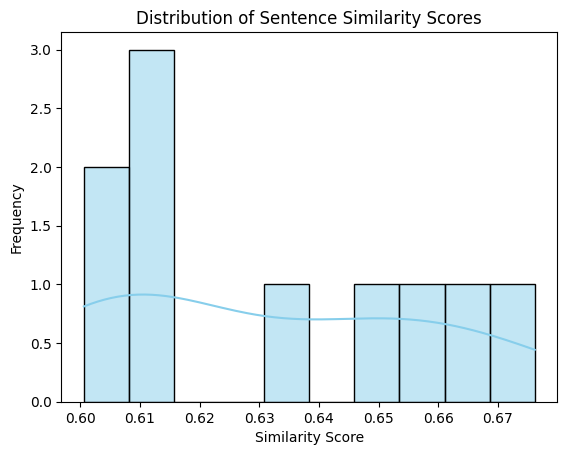

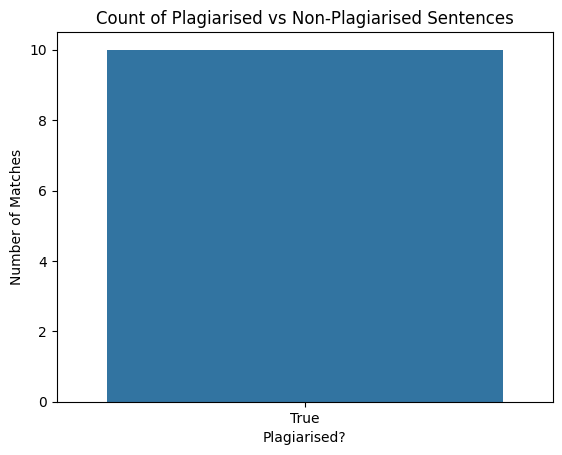

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the generated CSV
df = pd.read_csv("similarity_output.csv")

# Basic Summary
print(df.describe())

# Plot distribution of similarity scores
sns.histplot(df['Similarity_Score'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Sentence Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

# Add Plagiarism Label based on threshold
df['Plagiarised'] = df['Similarity_Score'] >= 0.6

# Count Plot
sns.countplot(x='Plagiarised', data=df)
plt.title("Count of Plagiarised vs Non-Plagiarised Sentences")
plt.xlabel("Plagiarised?")
plt.ylabel("Number of Matches")
plt.show()


In [44]:
total_matches = len(df)
plagiarised_matches = df['Plagiarised'].sum()
percentage = (plagiarised_matches / total_matches) * 100

print(f"🔢 Plagiarised Matches: {plagiarised_matches}/{total_matches}")
print(f"📊 Percentage Plagiarised: {percentage:.2f}%")


🔢 Plagiarised Matches: 10/10
📊 Percentage Plagiarised: 100.00%


In [45]:
from google.colab import files
files.download("similarity_output.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>